In [7]:
%tensorflow_version 1.x

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# MNIST Data

In [9]:
import tensorflow as tf
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

In [10]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


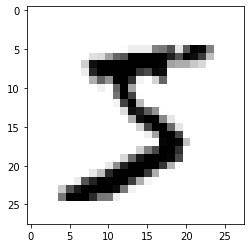

0


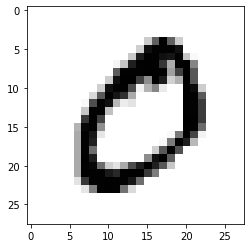

4


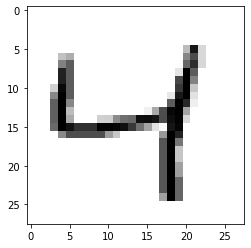

1


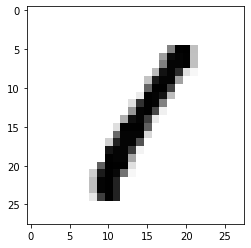

In [11]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()

# DNN Image Classification

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8319 - acc: 0.7478
Epoch 2/5
60000/60000 [========================

# CNN Image Classification

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y


model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                16010     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

# Dogs Data


```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
```

In [14]:
%%shell
rm -rf dogs_prepared.tar.gz
wget https://github.com/dhrim/chungbuk_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
ls -al  

--2021-04-21 20:36:24--  https://github.com/dhrim/chungbuk_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/chungbuk_2021/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2021-04-21 20:36:24--  https://raw.githubusercontent.com/dhrim/chungbuk_2021/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   297MB/s    in 0.2s    

2021-04-21 20:36

In [15]:
%%shell
rm -rf dogs_prepared
tar xvfz dogs_prepared.tar.gz
ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# CNN Image Classification with Data Augmentation

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time


model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

BATCH_SIZE=64

def preprocess_input(images):
  return images
  # return images/255.0

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1866250   
_________________________________________________________________
dense_26 (Dense)             (None, 10)               

# VGG16 Image Classification

In [16]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,      
      class_mode='sparse'
)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)



label = vgg16.decode_predictions(y_)
# label = [[('n02655020', 'puffer', 0.9612253), ... ]]
print(label[:5])

# 가장 확률이 높은 결과를 획득
label = label[0][0]
# label = ('n02655020', 'puffer', 0.9612253)
print(label)

# 라벨과 라벨을 예측한 확률을 출력
print('%s (%.2f%%)' % (label[1], label[2]*100))    



Found 388 images belonging to 10 classes.
[[('n02102177', 'Welsh_springer_spaniel', 0.6833136), ('n02086646', 'Blenheim_spaniel', 0.26219216), ('n02102318', 'cocker_spaniel', 0.048099745), ('n02102480', 'Sussex_spaniel', 0.0016404765), ('n02100877', 'Irish_setter', 0.0013612018)], [('n02086079', 'Pekinese', 0.9821931), ('n02102318', 'cocker_spaniel', 0.0041720876), ('n02086240', 'Shih-Tzu', 0.003921), ('n02085782', 'Japanese_spaniel', 0.0023090146), ('n02098413', 'Lhasa', 0.0021138494)], [('n02085782', 'Japanese_spaniel', 0.79735696), ('n02086910', 'papillon', 0.13581574), ('n02086646', 'Blenheim_spaniel', 0.023670303), ('n02086079', 'Pekinese', 0.012104559), ('n02105855', 'Shetland_sheepdog', 0.007119052)], [('n02085936', 'Maltese_dog', 0.79545283), ('n02096437', 'Dandie_Dinmont', 0.06706103), ('n02098413', 'Lhasa', 0.050966907), ('n02098286', 'West_Highland_white_terrier', 0.030171504), ('n02097474', 'Tibetan_terrier', 0.016438682)], [('n02087394', 'Rhodesian_ridgeback', 0.73498726),

# VGG16 Transfer Learning

In [17]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 25s 1s/step - loss: 112.0332 - acc: 0.5506 - val_loss: 12.0590 - val_acc: 0.8093
Epoch 2/10
24/23 [==============================] - 21s 888ms/step - loss: 11.1949 - acc: 0.7877 - val_loss: 8.9123 - val_acc: 0.8247
Epoch 3/10
24/23 [==============================] - 21s 889ms/step - loss: 8.6396 - acc: 0.8060 - val_loss: 7.8803 - val_acc: 0.8608
Epoch 4/10
24/23 [==============================] - 21s 880ms/step - loss: 8.1427 - acc: 0.8269 - val_loss: 11.3113 - val_acc: 0.8299
Epoch 5/10
24/23 [==============================] - 21s 883ms/step - loss: 6.5091 - acc: 0.8485 - val_loss: 6.5587 - val_acc: 0.8505
Epoch 6/10
24/23 [==============================] - 21s 891ms/step - loss: 4.1963 - acc: 0.8713 - val_loss: 5.5930 - val_acc: 0.8789
Epoch 7/10
24/23 [==============================] - 21s 887ms/step - loss: 4.1738 - acc: 0.8733 - val_loss: 5.6767 

# ResNet Transfer Learning

In [18]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10
)

loss, acc = model.evaluate_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 26s 1s/step - loss: 68.7750 - acc: 0.5016 - val_loss: 5.8031 - val_acc: 0.8479
Epoch 2/10
24/23 [==============================] - 21s 855ms/step - loss: 5.1347 - acc: 0.7936 - val_loss: 2.1724 - val_acc: 0.8943
Epoch 3/10
24/23 [==============================] - 21s 880ms/step - loss: 2.5795 - acc: 0.8308 - val_loss: 6.0918 - val_acc: 0.8119
Epoch 4/10
24/23 [==============================] - 21s 881ms/step - loss: 2.3991 - acc: 0.8556 - val_loss: 4.5815 - val_acc: 0.8067
Epoch 5/10
24/23 [==============================] - 21s 877ms/step - loss: 2.1694 - acc: 0.8400 - val_loss: 3.0071 - val_acc: 0.8582
Epoch 6/10
24/23 [==============================] - 21s 881ms/step - loss: 1.5055 - acc: 0.8674 - val_loss: 2.3366 - val_acc: 0.8660
Epoch 7/10
24/23 [==============================] - 21s 877ms/step - loss: 1.6451 - acc: 0.8733 - val_loss: 2.5462 - va